Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name below:

In [271]:
NAME = "Munzir H. Abdulmajid"

ME 535 Winter 2021

# Homework 1

Due Thursday 21 January 2021

Edit this Jupyter notebook to include you responses to the questions below. Save the file (with extension .ipynb) and submit your Homework by uploading the file via Canvas.

__This is an individual assignment, so the answers you submit must be your own work.__

Here are a couple links to info that may be useful as you get started working with python using Jupyter notebooks:

Link to Jupyter notebook intro:<br>
https://www.dataquest.io/blog/jupyter-notebook-tutorial/

Python primer on Colab:<br>
https://colab.research.google.com/github/lewtun/hepml/blob/master/notebooks/python-primer.ipynb

0) Work through the "Ch1_intro" notebook as you read through Ch. 1 in the text.

The problems below aim to help you build your python skills while exploring basic concepts underlying numerical methods.

Recall that the example system was characterized by the following parameter values: $\beta=2, p=2, e \in \{-1,0,1\}$. 

Here we embellish slightly by adding 1 precision bit and 1 exponent bitto get: $\beta=2, p=3, e \in \{-3,-2,-1,0,1,2,3\}$

## 1) 2 points each for parts a and c

1a) Write a function (by completing the template below) that computes the represented number corresponding to a specific set of parameter values. For this part of the question, assume that all input values are of the appropriate type (i.e., `digits` is a list of integers and the other arguments are integers).

In [272]:
from nose.tools import assert_equal, assert_raises

In [273]:
def list_to_num(sign_bit, digits, exponent, base=2):
    """
    compute the numerical value corresponding to floating point parameter values
    
    Args:
        sign_bit: 0 for positive, 1 for negative
        digits: list of integer digits in range[0,base]
        exponent: integer exponent value
    Named args:
        base: default value 2
    
    Returns:
        float value of represented number
    """
    sign = (-1)**sign_bit
    numeric_sum = 0
    iteration = 0
    for x in digits:
        numeric_sum += x/(base**iteration)*(base**exponent)
        iteration += 1
    sign * numeric_sum
    return sign * numeric_sum

Test your function definition by entering `(list_to_num(0, [1,1,1], 3)` in a code cell and evaluating. 
This should produce the largest number the system can represent.
What should this largest value be? Check that your function produces the appropriate value.

The cell below performs additional tests in an automated fashion.
Each `assert_equal` statement takes 2 arguments: a function call and an output value. 
If the function call produces the specified value, then the assertion is valid and no output is produced.
Messages will be generated to alert you if there are cases for which the function call does NOT produce the specified value.

In [274]:
assert_equal(list_to_num(0, [1,0,0], 0), 1)
assert_equal(list_to_num(0, [1,0,1], 1), 2.5)
assert_equal(list_to_num(1, [1,0,1], 1), -2.5)
assert_equal(list_to_num(0, [1,0,1], 2), 5.0)

1b) Write a similar function that produces the numerical value represented by the arguments, but this time assume that `digits` is a `numpy ndarray` instead of a python `list`.

In [275]:
import numpy as np

def array_to_num(sign_bit, digits, exponent, base=2):
    """
    compute the numerical value corresponding to floating point parameter values
    
    Args:
        sign_bit: 0 for positive, 1 for negative
        digits: 1D numpy array of integer digits in range[0,base]
        exponent: integer exponent value
    Named args:
        base: default value 2
    
    Returns:
        float value of represented number
    """
    sign = (-1)**sign_bit
    digit = np.divide(digits*(base**exponent),base ** np.arange(0,len(digits)))
    return np.sum(sign * digit)
    return value

In [276]:
assert_equal(array_to_num(0, np.array([1,0,0]), 0),            1)
assert_equal(array_to_num(0, np.array([1,0,1]), 1),          2.5)
assert_equal(array_to_num(1, np.array([1,0,1]), 1),         -2.5)
assert_equal(array_to_num(0, np.array([1,0,1]), 2),          5.0)
assert_equal(array_to_num(0, np.array([1,0,1]), 2, base=10), 101)

1c) You should expect some of the assertions might fail initially. Can you figure out why and fix the problem? 

HINT: Check the data type of your digits argument. Is your code doing integer or floating point arithmetic>

In [277]:
def array_to_num2(sign_bit, digits, exponent, base=2):
    """
    compute the numerical value corresponding to floating point parameter values
    
    Args:
        sign_bit: 0 for positive, 1 for negative
        digits: 1D numpy array of integer digits in range[0,base]
        exponent: integer exponent value
    Named args:
        base: default value 2
    
    Returns:
        float value of represented number
    """
    sign = (-1)**sign_bit
    digits.astype('int')    #converts the data type of the digits to integer type
    digit = np.divide(digits*(base**exponent),base ** np.arange(0,len(digits)))
    return np.sum(sign * digit)
    return value

In [278]:
assert_equal(array_to_num2(0, np.array([1,0,0]), 0), 1)
assert_equal(array_to_num2(0, np.array([1,0,1]), 1), 2.5)
assert_equal(array_to_num2(1, np.array([1,0,1]), 1), -2.5)
assert_equal(array_to_num2(0, np.array([1,0,1]), 2), 5.0)

## 2) 2 points each for a,b,c

2a) As part of the floating point number representation, we need to specify an integer-valued exponent. 
Internally, the exponent is also represented as a sequence of binary digits.

If $q$ digits are allocated for the exponent, $2^q$ exponent values can be represented.
For example, an 8-bit integer can represent $2^8 = 256$ values, and the represented range is often chosen to be $\{0,1,\ldots ,254, 255 \}$ for the specification of things like intensity of color channels (e.g. RGB).

When working with exponents instead of intensities we are equally interested in positive and negative values (and definitely want to include zero), so the usual convention is to shift the represented value by subtracting $127$ to represent the "symmetric range" $\{-127, -126, \ldots, -1, 0, 1, \ldots , 127,128\}$.

Write a function below that outputs a 2-tuple of integers corresponding to the minimum and maximum values of the exponents in the symmetric range for a $q$-bit integer.

In [279]:
def sym_bounds(q):
    """
    compute the min,max values for a symmetric range of a q-bit integer
    
    Args:
        q: number of binary digits
    
    Returns:
        integer 2-tuple of min and max values
    """

 
    min_value = -2**(q-1)+1
    max_value = 2**(q-1)
    value_range =(min_value,max_value)


    return value_range

    #A simpler way to do it is: return (int(1-2 ** q/2),int(2 ** q/2))
    #I used the above code because I didn't know if I'm allowed to change return value_range on the hw

In [280]:
assert_equal(sym_bounds(8), (-127, 128))

2b) Write a function (by completing the template below) to produce a numpy array containing the sorted gamut of normalized representable positive numbers for a floating point system with $3$ binary digits of precision and $3$ binary digits for specifying the exponent. 
<br>__Hints__: 
<br>Start by computing the number `n0` of normalized mantissa values described by $3$ digits and the symmetric range $(e_{min}, e_{max})$ of 3-digit exponents.
<br>Create a 1D array of length `n0` and and store the representable values corresponding to exponent $e=0$.
<br>Create a 1D array of size $2^q$ and store the values of $2^e$ for $e$ in the representable range of exponents.
<br>Create a 2D array of size $n0 \times 2^q$ and use a doubly nested loop to store the product of each mantissa with each exponential.
<br>Find numpy functions to flatten and sort the list.

In [283]:
import numpy as np

def pos_gamut3():
    """
    compute the representable values for a floating point system
    
    Args:
        NONE
    
    Returns:
        numpy array of normalized positive values for 3 digits and 3-bit exponent
    """
    a=np.array([[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
    exp = [-3 , -2 , -1 ,0 , 1 , 2 , 3 , 4]
    vals = np.zeros((4,8))
    for x in range(len(a)):
        for y in range(len(exp)):
          vals[x,y]=array_to_num(0, a[x], exp[y],base=2)
          
    vals = vals.flatten()
    vals = np.sort(vals)
 
    return vals

2c) Compute the gamut for the system and create a plot to illustrate the representable values.

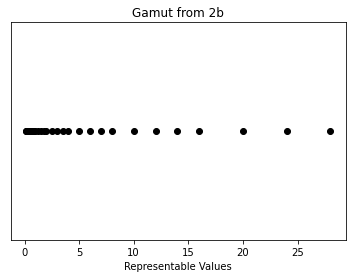

In [282]:
import matplotlib.pyplot as plt
from sympy import symbols
plt.title('Gamut from 2b')
plt.xlabel('Representable Values')
plt.yticks([])
plt.plot([pos_gamut3()],[0],'ko')
plt.show()

## 3) 2 points each for a,b,c

3a) Write a function that rounds a floating point input `x` to the nearest value in an array `a`:

In [284]:
def my_round(x, a):
    """
    round a number to the nearest element of an array of ordered values
    
    Args:
        x: input numeric value
        a: ordered array of representable numerical values
    
    Returns:
        element of a closest to x
    """
    
    a = np.asarray(a)
    value = (np.abs(a-x)).argmin()
    x_bar = a[value]
    
    return x_bar

x = pos_gamut3()

In [285]:
assert_equal(my_round(17, x), 16)
assert_equal(my_round(19, x), 20)

3b) Write a function that returns the absolute rounding error for a given input value:

In [286]:
def err_abs(x, a):
    """
    error in rounding a number x to the nearest element of an array a
    
    Args:
        x: input numeric value
        a: numpy array of numerical values
    
    Returns:
        distance from x to closest element of a
    """
    #Using the my_round function defined in the previous problem
    err=abs(x-my_round(x,a))
    return (err)
    a=pos_gamut3()

    #another way to solve this is by copying the code used in 3a
    #then subtracting the value of x_bar from x (x_bar-x)

In [287]:
import numpy.testing as npt
npt.assert_almost_equal(err_abs(0.8, a), 0.05)

In [153]:
3c) Write a function that returns the relative rounding error for a given input value:

In [288]:
def err_rel(x, a):
    """
    error in rounding a number x to the nearest element of an array a
    
    Args:
        x: input numeric value
        a: numpy array of numerical values
    
    Returns:
        distance from x to closest element of a
    """
    a = np.asarray(a)
    value = (np.abs(a-x)).argmin()
    x_bar = a[value]
    err = abs(x - my_round(x,a))/abs(x)

    return err

In [289]:
npt.assert_almost_equal(err_rel(0.8, a), 0.05/0.8)

## 4) 2 points each for a,b,c

a) Construct an array `t` of 200 values equally spaced over the interval $x \in [0.5,5.0]$

Use the function you wrote in 3c above to compute the array `e_abs` of absolute errors for each value in `t`.

In [290]:
"""Constructing an array t containing 200 equally spaced values ranging from 0.5 to 5.0 & then construct a 200x1 zero array in order to calculate the absolute error for each value in t using the function written in 3c
"""

t=np.linspace(0.5,5.0,200)
e_abs=np.zeros((200,1))
for i in range(1,len(t)):
    e_abs[i]=err_abs(t[i],a)
print(e_abs)


[[0.        ]
 [0.02261307]
 [0.04522613]
 [0.0571608 ]
 [0.03454774]
 [0.01193467]
 [0.01067839]
 [0.03329146]
 [0.05590452]
 [0.04648241]
 [0.02386935]
 [0.00125628]
 [0.02135678]
 [0.04396985]
 [0.05841709]
 [0.03580402]
 [0.01319095]
 [0.00942211]
 [0.03203518]
 [0.05464824]
 [0.04773869]
 [0.02512563]
 [0.00251256]
 [0.0201005 ]
 [0.04271357]
 [0.06532663]
 [0.0879397 ]
 [0.11055276]
 [0.11683417]
 [0.09422111]
 [0.07160804]
 [0.04899497]
 [0.02638191]
 [0.00376884]
 [0.01884422]
 [0.04145729]
 [0.06407035]
 [0.08668342]
 [0.10929648]
 [0.11809045]
 [0.09547739]
 [0.07286432]
 [0.05025126]
 [0.02763819]
 [0.00502513]
 [0.01758794]
 [0.04020101]
 [0.06281407]
 [0.08542714]
 [0.1080402 ]
 [0.11934673]
 [0.09673367]
 [0.0741206 ]
 [0.05150754]
 [0.02889447]
 [0.00628141]
 [0.01633166]
 [0.03894472]
 [0.06155779]
 [0.08417085]
 [0.10678392]
 [0.12060302]
 [0.09798995]
 [0.07537688]
 [0.05276382]
 [0.03015075]
 [0.00753769]
 [0.01507538]
 [0.03768844]
 [0.06030151]
 [0.08291457]
 [0.10

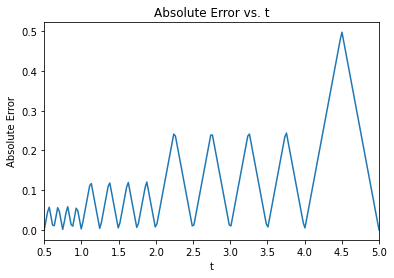

In [291]:
# Plot `e_abs` versus `t`.
plt.plot(t,e_abs)
plt.title('Absolute Error vs. t')
plt.ylabel('Absolute Error')
plt.xlabel('t')
plt.xlim((0.5, 5.0))
plt.show()

4b) Use the function you wrote above to compute the array `e_rel` of relative errors for each value in `t` and plot `e_rel` versus `t`.

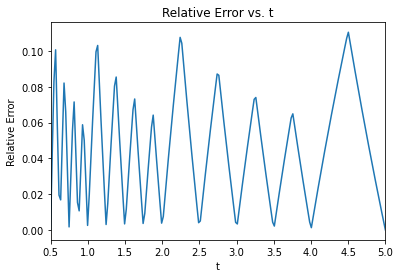

In [292]:
t = np.linspace(0.5,5.0,200)
e_rel = np.zeros((200,1))
for i in range(1,len(t)):
    e_rel[i] = err_rel(t[i], a)
plt.plot(t,e_rel)
plt.title('Relative Error vs. t')
plt.ylabel('Relative Error')
plt.xlabel('t')
plt.xlim((0.5, 5.0))
plt.show()

4c) What is machine epsilon for this floating point system? Explain how you arrived at your answer and how that answer relates to your plot of relative error.

In [293]:
B=2 #Base (computers use binary with B=2)
p=3 #precision (number of digits)
machine_epsilon = (1/2)*B**(1-p)
print(machine_epsilon)
#from the finite_precision_slides we know that Machine epsilon is the smallest number you can add to 1 without producing the result 1. 
# The unit roundoff/the upper bound on relative rounding error = (1/2)B**(1-p) and machine epsilon is calculated using this equation with a binary base and a precision of 3 based on the number of digits.
#Looking at the relative error plot we find that the unit roundoff/upper bound on relative rounding error caculated (0.125) is greater than the greatest relative error shown in the graph which proves that machine epsilon is the maximum (upper bound) of the relative error.'

0.125
